In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Directorios
model_path = Path('/content/drive/MyDrive/Notebooks/ML/which_mario.keras')

tests = '/content/drive/MyDrive/Notebooks/ML/test'

# Cargar modelo
model = tf.keras.models.load_model(model_path)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
					tests,
					target_size = (255, 255),
					color_mode='rgba',
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_gen, steps = 25)
print(f'\ntest acc  {test_acc:.4f}:\n')


Found 798 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7548 - loss: 0.5060

test acc  0.7460:



In [5]:
# Preciser predictions
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Trues
y_true = test_gen.classes
# Class names
class_labels = list(test_gen.class_indices.keys())

# Metric breakdown
print("Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step
Report:

              precision    recall  f1-score   support

         SMG       0.57      0.53      0.55       471
         SMO       0.39      0.43      0.41       327

    accuracy                           0.49       798
   macro avg       0.48      0.48      0.48       798
weighted avg       0.50      0.49      0.49       798



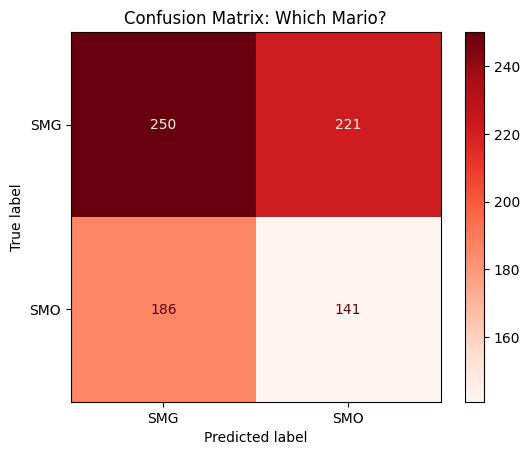

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Show matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
cm_display.plot(cmap='Reds')
plt.title("Confusion Matrix: Which Mario?")
plt.show()

In [7]:
def which_mario(_img):
  # Cargar imagen que viene
  img = tf.keras.utils.load_img(_img, target_size=(255, 255), color_mode="rgba")
  converted_img = tf.keras.utils.img_to_array(img) / 255.
  converted_img = np.expand_dims(converted_img, 0)

  # Predecir
  prediction = model.predict(converted_img, verbose=0)
  predicted_class = prediction[0][0]

  # Mientras más cercano a 0.5, más desconfiado es
  if predicted_class-0.5 < 0:
    # Clase 0 en binario
    certainty = float(np.max(np.absolute(predicted_class-0.5)/0.5)) # Sacar el porcentaje de confianza
    predicted_class = 'Super Mario Galaxy'
  else:
    # Clase 1 en binario
    certainty = float(np.max(np.absolute(predicted_class-0.5)/0.5))
    predicted_class = 'Super Mario Odyssey'
  return certainty, predicted_class, img

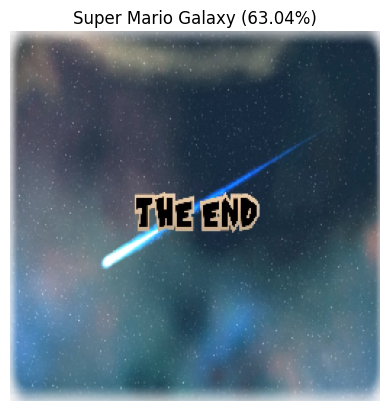

In [8]:
pred_cert, pred_class, img = which_mario('/content/SMG2_Vinny.png')

plt.imshow(img)
plt.axis('off')
plt.title(f'{pred_class} ({pred_cert*100:.2f}%)')
plt.show()